In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import sys

sys.path.append('../')

from eda import utils

tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [2]:
small = tracks['set', 'subset'] <= 'small'
X = features.loc[small]
y = tracks['track', 'genre_top'].loc[small]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be rai

               precision    recall  f1-score   support

   Electronic       0.31      0.31      0.31       203
 Experimental       0.34      0.18      0.24       208
         Folk       0.35      0.49      0.40       202
      Hip-Hop       0.41      0.49      0.44       204
 Instrumental       0.42      0.54      0.47       194
International       0.39      0.35      0.37       212
          Pop       0.26      0.19      0.22       199
         Rock       0.52      0.52      0.52       178

     accuracy                           0.38      1600
    macro avg       0.38      0.38      0.37      1600
 weighted avg       0.37      0.38      0.37      1600



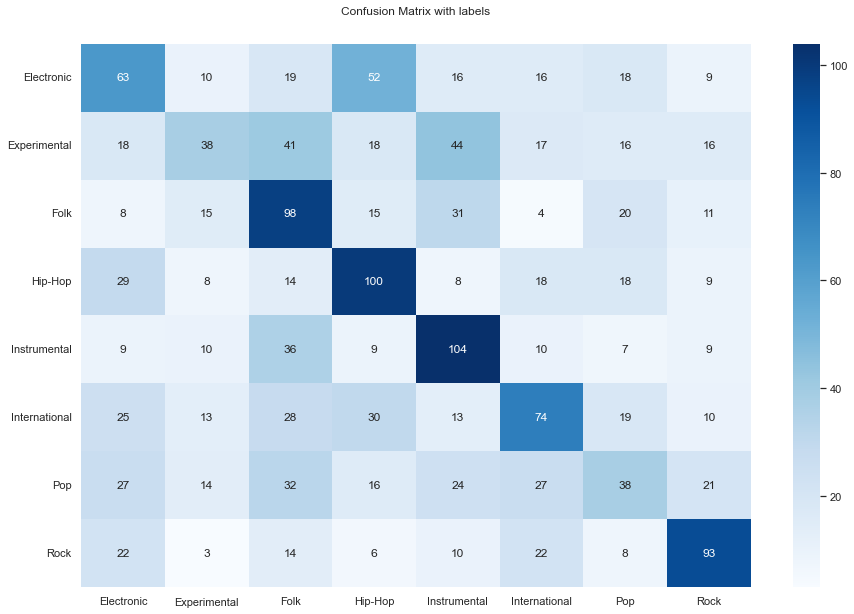

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X=X_train, y=y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(lr.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(lr.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()